Install Packages

In [ ]:
! pip install tflite-model-maker tensorflow==2.5

In [ ]:

# !pip install numpy

In [3]:
import tensorflow as tf

import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import glob
import random

from IPython.display import Audio, Image
from scipy.io import wavfile

print(f"TensorFlow Version: {tf.__version__}")
# print(f"Model Maker Version: {mm.__version__}")

TensorFlow Version: 2.5.0


download dataset

In [4]:
birds_dataset_folder = tf.keras.utils.get_file('birds_dataset.zip',
                                                'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/birds_dataset.zip',
                                                cache_dir='./',
                                                cache_subdir='dataset',
                                                extract=True)

343687168/343680986 [==============================] - 3s 0us/step


Listen to random picked audio file

In [5]:
data_dir = './dataset/small_birds_dataset'

bird_code_to_name = {
  'wbwwre1': 'White-breasted Wood-Wren',
  'houspa': 'House Sparrow',
  'redcro': 'Red Crossbill',  
  'chcant2': 'Chestnut-crowned Antpitta',
  'azaspi1': "Azara's Spinetail",   
}

birds_images = {
  'wbwwre1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg/640px-Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg', # 	Alejandro Bayer Tamayo from Armenia, Colombia 
  'houspa': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/House_Sparrow%2C_England_-_May_09.jpg/571px-House_Sparrow%2C_England_-_May_09.jpg', # 	Diliff
  'redcro': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Red_Crossbills_%28Male%29.jpg/640px-Red_Crossbills_%28Male%29.jpg', #  Elaine R. Wilson, www.naturespicsonline.com
  'chcant2': 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Chestnut-crowned_antpitta_%2846933264335%29.jpg/640px-Chestnut-crowned_antpitta_%2846933264335%29.jpg', # 	Mike's Birds from Riverside, CA, US
  'azaspi1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Synallaxis_azarae_76608368.jpg/640px-Synallaxis_azarae_76608368.jpg', # https://www.inaturalist.org/photos/76608368
}

test_files = os.path.join('/content', data_dir, 'test/*/*.wav')


def get_random_audio_file():
  test_list = glob.glob(test_files)
  random_audio_path = random.choice(test_list)
  return random_audio_path


def show_bird_data(audio_path):
  sample_rate, audio_data = wavfile.read(audio_path, 'rb')

  bird_code = audio_path.split('/')[-2]
  print(f'Bird name: {bird_code_to_name[bird_code]}')
  print(f'Bird code: {bird_code}')
  display(Image(birds_images[bird_code]))

  plttitle = f'{bird_code_to_name[bird_code]} ({bird_code})'
  plt.title(plttitle)
  plt.plot(audio_data)
  display(Audio(audio_data, rate=sample_rate))

print('functions and data structures created')

functions and data structures created


Bird name: Azara's Spinetail
Bird code: azaspi1


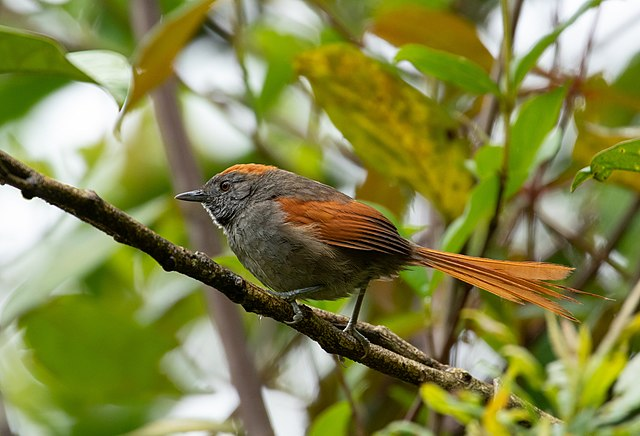

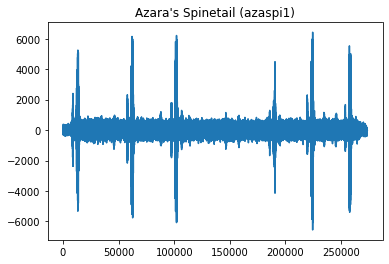

In [6]:
random_audio = get_random_audio_file()
show_bird_data(random_audio)

In [ ]:
pip install numpy==1.20.1 toad

In [7]:
# import tflite_model_maker as mm
from tflite_model_maker import audio_classifier

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


Train the model

In [8]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=3 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=6 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH)

INFO:tensorflow:Checkpoints are stored in /tmp/tmpgel3mrpi


Load the data

In [9]:
train_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'train'), cache=True)
train_data, validation_data = train_data.split(0.8)
test_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'test'), cache=True)

Train the model with 100 epochs and 128 batch size

In [10]:
batch_size = 128
epochs = 50

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)

Training the model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
classification_head (Dense)  (None, 5)                 5125      
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 [==============================] - 274s 11s/step - loss: 1.4504 - acc: 0.3817 - val_loss: 1.3679 - val_acc: 0.4139
Epoch 2/50
23/23 [==============================] - 1s 34ms/step - loss: 1.2387 - acc: 0.5293 - val_loss: 1.2323 - val_acc: 0.5450
Epoch 3/50
23/23 [==============================] - 1s 36ms/step - loss: 1.0945 - acc: 0.6148 - val_loss: 1.1354 - val_acc: 0.6114
Epoch 4/50
23/23 [==============================] - 1s 36ms/step - loss: 0.9947 - acc: 0.6615 - val_loss: 1.0675 - val_acc: 0.6540
Epoch 5/50
23/23 [==============================] - 1s 36ms/step - loss: 0.9044 - acc: 0.7100 - val_loss

Evaluate model

In [11]:
print('Evaluating the model')
model.evaluate(test_data)

Evaluating the model
28/28 [==============================] - 59s 2s/step - loss: 0.8173 - acc: 0.7899


[0.8173311948776245, 0.7898966670036316]